In [1]:
# Import our dependencies
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
import pandas as pd
import tensorflow as tf

# Import our input dataset
charity_df = pd.read_csv('charity_data.csv')
charity_df

,EIN,NAME,APPLICATION_TYPE,AFFILIATION,CLASSIFICATION,USE_CASE,ORGANIZATION,STATUS,INCOME_AMT,SPECIAL_CONSIDERATIONS,ASK_AMT,IS_SUCCESSFUL
0,10520599,BLUE KNIGHTS MOTORCYCLE CLUB,T10,Independent,C1000,ProductDev,Association,1,0,N,5000,1
1,10531628,AMERICAN CHESAPEAKE CLUB CHARITABLE TR,T3,Independent,C2000,Preservation,Co-operative,1,1-9999,N,108590,1
2,10547893,ST CLOUD PROFESSIONAL FIREFIGHTERS,T5,CompanySponsored,C3000,ProductDev,Association,1,0,N,5000,0
3,10553066,SOUTHSIDE ATHLETIC ASSOCIATION,T3,CompanySponsored,C2000,Preservation,Trust,1,10000-24999,N,6692,1
4,10556103,GENETIC RESEARCH INSTITUTE OF THE DESERT,T3,Independent,C1000,Heathcare,Trust,1,100000-499999,N,142590,1
...,...,...,...,...,...,...,...,...,...,...,...,...
34294,996009318,THE LIONS CLUB OF HONOLULU KAMEHAMEHA,T4,Independent,C1000,ProductDev,Association,1,0,N,5000,0
34295,996010315,INTERNATIONAL ASSOCIATION OF LIONS CLUBS,T4,CompanySponsored,C3000,ProductDev,Association,1,0,N,5000,0
34296,996012607,PTA HAWAII CONGRESS,T3,CompanySponsored,C2000,Preservation,Association,1,0,N,5000,0
34297,996015768,AMERICAN FEDERATION OF GOVERNMENT EMPLOYEES LO...,T5,Independent,C3000,ProductDev,Association,1,0,N,5000,1


In [2]:
charity_df.dtypes

EIN                        int64
NAME                      object
APPLICATION_TYPE          object
AFFILIATION               object
CLASSIFICATION            object
USE_CASE                  object
ORGANIZATION              object
STATUS                     int64
INCOME_AMT                object
SPECIAL_CONSIDERATIONS    object
ASK_AMT                    int64
IS_SUCCESSFUL              int64
dtype: object

In [3]:
# Create a data  frame with charity name and EIN
name_EIN_df=charity_df[['EIN','NAME']]
name_EIN_df

,EIN,NAME
0,10520599,BLUE KNIGHTS MOTORCYCLE CLUB
1,10531628,AMERICAN CHESAPEAKE CLUB CHARITABLE TR
2,10547893,ST CLOUD PROFESSIONAL FIREFIGHTERS
3,10553066,SOUTHSIDE ATHLETIC ASSOCIATION
4,10556103,GENETIC RESEARCH INSTITUTE OF THE DESERT
...,...,...
34294,996009318,THE LIONS CLUB OF HONOLULU KAMEHAMEHA
34295,996010315,INTERNATIONAL ASSOCIATION OF LIONS CLUBS
34296,996012607,PTA HAWAII CONGRESS
34297,996015768,AMERICAN FEDERATION OF GOVERNMENT EMPLOYEES LO...


In [4]:
# Select only active charities

charity_df_1=charity_df[charity_df.STATUS==1]
charity_df_1

,EIN,NAME,APPLICATION_TYPE,AFFILIATION,CLASSIFICATION,USE_CASE,ORGANIZATION,STATUS,INCOME_AMT,SPECIAL_CONSIDERATIONS,ASK_AMT,IS_SUCCESSFUL
0,10520599,BLUE KNIGHTS MOTORCYCLE CLUB,T10,Independent,C1000,ProductDev,Association,1,0,N,5000,1
1,10531628,AMERICAN CHESAPEAKE CLUB CHARITABLE TR,T3,Independent,C2000,Preservation,Co-operative,1,1-9999,N,108590,1
2,10547893,ST CLOUD PROFESSIONAL FIREFIGHTERS,T5,CompanySponsored,C3000,ProductDev,Association,1,0,N,5000,0
3,10553066,SOUTHSIDE ATHLETIC ASSOCIATION,T3,CompanySponsored,C2000,Preservation,Trust,1,10000-24999,N,6692,1
4,10556103,GENETIC RESEARCH INSTITUTE OF THE DESERT,T3,Independent,C1000,Heathcare,Trust,1,100000-499999,N,142590,1
...,...,...,...,...,...,...,...,...,...,...,...,...
34294,996009318,THE LIONS CLUB OF HONOLULU KAMEHAMEHA,T4,Independent,C1000,ProductDev,Association,1,0,N,5000,0
34295,996010315,INTERNATIONAL ASSOCIATION OF LIONS CLUBS,T4,CompanySponsored,C3000,ProductDev,Association,1,0,N,5000,0
34296,996012607,PTA HAWAII CONGRESS,T3,CompanySponsored,C2000,Preservation,Association,1,0,N,5000,0
34297,996015768,AMERICAN FEDERATION OF GOVERNMENT EMPLOYEES LO...,T5,Independent,C3000,ProductDev,Association,1,0,N,5000,1


In [5]:
# Remove EIN, NAME, STATUS, CLASSIFICATION, SPECIAL_CONSIDERATION
charity_df_2=charity_df_1.drop(columns=['EIN','NAME', 'STATUS', 'CLASSIFICATION', 'SPECIAL_CONSIDERATIONS'])
charity_df_2

,APPLICATION_TYPE,AFFILIATION,USE_CASE,ORGANIZATION,INCOME_AMT,ASK_AMT,IS_SUCCESSFUL
0,T10,Independent,ProductDev,Association,0,5000,1
1,T3,Independent,Preservation,Co-operative,1-9999,108590,1
2,T5,CompanySponsored,ProductDev,Association,0,5000,0
3,T3,CompanySponsored,Preservation,Trust,10000-24999,6692,1
4,T3,Independent,Heathcare,Trust,100000-499999,142590,1
...,...,...,...,...,...,...,...
34294,T4,Independent,ProductDev,Association,0,5000,0
34295,T4,CompanySponsored,ProductDev,Association,0,5000,0
34296,T3,CompanySponsored,Preservation,Association,0,5000,0
34297,T5,Independent,ProductDev,Association,0,5000,1


In [6]:
# Print out the APPLICATION_TYPE value counts
APPLICATION_TYPE_counts = charity_df_2.APPLICATION_TYPE.value_counts()
APPLICATION_TYPE_counts

T3     27032
T4      1542
T6      1216
T5      1173
T19     1065
T8       737
T7       725
T10      528
T9       156
T13       66
T12       27
T2        16
T25        3
T14        3
T29        2
T15        2
T17        1
Name: APPLICATION_TYPE, dtype: int64

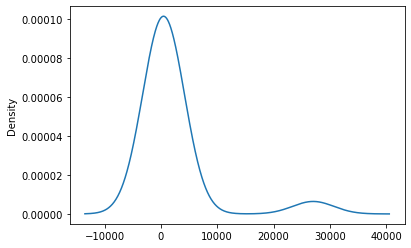

In [7]:
# Visualize the value counts
APPLICATION_TYPE_counts.plot.density()

In [8]:
APPLICATION_TYPE_counts.median()

156.0

In [9]:
# Determine which values to replace
replace_APPLICATION_TYPE = list(APPLICATION_TYPE_counts[APPLICATION_TYPE_counts < 200].index)
replace_APPLICATION_TYPE

['T9', 'T13', 'T12', 'T2', 'T25', 'T14', 'T29', 'T15', 'T17']

In [10]:
# Replace in DataFrame
for application in replace_APPLICATION_TYPE:
    charity_df_2.APPLICATION_TYPE = charity_df_2.APPLICATION_TYPE.replace(application,"Other")

In [11]:
# Check to make sure binning was successful
charity_df_2.APPLICATION_TYPE.value_counts()

T3       27032
T4        1542
T6        1216
T5        1173
T19       1065
T8         737
T7         725
T10        528
Other      276
Name: APPLICATION_TYPE, dtype: int64

In [12]:
# Print out the AFFILIATION value counts
AFFILIATION_counts = charity_df_2.AFFILIATION.value_counts()
AFFILIATION_counts

Independent         18477
CompanySponsored    15703
Family/Parent          64
National               33
Regional               13
Other                   4
Name: AFFILIATION, dtype: int64

In [13]:
# Print out the USE_CASE value counts
USE_CASE_counts = charity_df_2.USE_CASE.value_counts()
USE_CASE_counts

Preservation     28092
ProductDev        5671
CommunityServ      382
Heathcare          146
Other                3
Name: USE_CASE, dtype: int64

In [14]:
# Generate our categorical variable list
charity_cat = charity_df_2.dtypes[charity_df_2.dtypes == "object"].index.tolist()
charity_cat

['APPLICATION_TYPE', 'AFFILIATION', 'USE_CASE', 'ORGANIZATION', 'INCOME_AMT']

In [15]:
# Check the number of unique values in each column
charity_df_2[charity_cat].nunique()

APPLICATION_TYPE    9
AFFILIATION         6
USE_CASE            5
ORGANIZATION        4
INCOME_AMT          9
dtype: int64

In [16]:
# Create a OneHotEncoder instance
enc = OneHotEncoder(sparse=False)

# Fit and transform the OneHotEncoder using the categorical variable list
encode_df = pd.DataFrame(enc.fit_transform(charity_df_2[charity_cat]))

# Add the encoded variable names to the DataFrame
encode_df.columns = enc.get_feature_names(charity_cat)
encode_df

,APPLICATION_TYPE_Other,APPLICATION_TYPE_T10,APPLICATION_TYPE_T19,APPLICATION_TYPE_T3,APPLICATION_TYPE_T4,APPLICATION_TYPE_T5,APPLICATION_TYPE_T6,APPLICATION_TYPE_T7,APPLICATION_TYPE_T8,AFFILIATION_CompanySponsored,...,ORGANIZATION_Trust,INCOME_AMT_0,INCOME_AMT_1-9999,INCOME_AMT_10000-24999,INCOME_AMT_100000-499999,INCOME_AMT_10M-50M,INCOME_AMT_1M-5M,INCOME_AMT_25000-99999,INCOME_AMT_50M+,INCOME_AMT_5M-10M
0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,...,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
34289,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
34290,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
34291,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
34292,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [17]:
charity_df_2

,APPLICATION_TYPE,AFFILIATION,USE_CASE,ORGANIZATION,INCOME_AMT,ASK_AMT,IS_SUCCESSFUL
0,T10,Independent,ProductDev,Association,0,5000,1
1,T3,Independent,Preservation,Co-operative,1-9999,108590,1
2,T5,CompanySponsored,ProductDev,Association,0,5000,0
3,T3,CompanySponsored,Preservation,Trust,10000-24999,6692,1
4,T3,Independent,Heathcare,Trust,100000-499999,142590,1
...,...,...,...,...,...,...,...
34294,T4,Independent,ProductDev,Association,0,5000,0
34295,T4,CompanySponsored,ProductDev,Association,0,5000,0
34296,T3,CompanySponsored,Preservation,Association,0,5000,0
34297,T5,Independent,ProductDev,Association,0,5000,1


In [18]:
# Merge one-hot encoded features and drop the originals

charity_df_2 = charity_df_2.merge(encode_df,left_index=True, right_index=True)
charity_df_2 = charity_df_2.drop(charity_cat,1)
charity_df_2

,ASK_AMT,IS_SUCCESSFUL,APPLICATION_TYPE_Other,APPLICATION_TYPE_T10,APPLICATION_TYPE_T19,APPLICATION_TYPE_T3,APPLICATION_TYPE_T4,APPLICATION_TYPE_T5,APPLICATION_TYPE_T6,APPLICATION_TYPE_T7,...,ORGANIZATION_Trust,INCOME_AMT_0,INCOME_AMT_1-9999,INCOME_AMT_10000-24999,INCOME_AMT_100000-499999,INCOME_AMT_10M-50M,INCOME_AMT_1M-5M,INCOME_AMT_25000-99999,INCOME_AMT_50M+,INCOME_AMT_5M-10M
0,5000,1,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,108590,1,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,5000,0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,6692,1,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
4,142590,1,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
34289,20197,1,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
34290,5000,0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
34291,5000,0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
34292,5000,0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


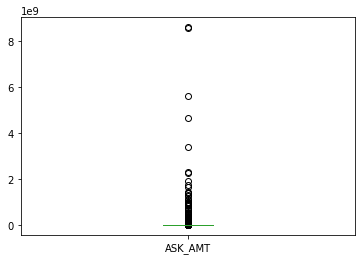

In [19]:
# Checking for outliers in ASK_AMT

charity_df_2.ASK_AMT.plot.box()

In [20]:
# Detecting outliers using inter quartile range

Q1 = charity_df_2['ASK_AMT'].quantile(0.25)
Q3 = charity_df_2['ASK_AMT'].quantile(0.75)
IQR = Q3 - Q1 
IQR

2746.0

In [21]:
# Dataset without ASK_AMT outliers

filter = (charity_df_2['ASK_AMT'] >= Q1 - 1.5 * IQR) & (charity_df_2['ASK_AMT'] <= Q3 + 1.5 *IQR)
charity_df_3=charity_df_2.loc[filter] 
charity_df_3

,ASK_AMT,IS_SUCCESSFUL,APPLICATION_TYPE_Other,APPLICATION_TYPE_T10,APPLICATION_TYPE_T19,APPLICATION_TYPE_T3,APPLICATION_TYPE_T4,APPLICATION_TYPE_T5,APPLICATION_TYPE_T6,APPLICATION_TYPE_T7,...,ORGANIZATION_Trust,INCOME_AMT_0,INCOME_AMT_1-9999,INCOME_AMT_10000-24999,INCOME_AMT_100000-499999,INCOME_AMT_10M-50M,INCOME_AMT_1M-5M,INCOME_AMT_25000-99999,INCOME_AMT_50M+,INCOME_AMT_5M-10M
0,5000,1,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,5000,0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,6692,1,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
5,5000,1,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
9,5000,0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
34288,5000,0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
34290,5000,0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
34291,5000,0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
34292,5000,0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


## Standardization

In [22]:
# Split our preprocessed data into our features and target arrays
y = charity_df_3["IS_SUCCESSFUL"].values
X = charity_df_3.drop(columns=["IS_SUCCESSFUL"]).values

# Split the preprocessed data into a training and testing dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=78)

In [23]:
# Create a StandardScaler instance
scaler = StandardScaler()

# Fit the StandardScaler
X_scaler = scaler.fit(X_train)

# Scale the data
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

In [24]:
X_test_scaled 

array([[-0.13548137, -0.07689736, -0.13477329, ..., -0.32356225,
        -0.0563855 , -0.06760323],
       [-0.13548137, -0.07689736, -0.13477329, ..., -0.32356225,
        -0.0563855 , -0.06760323],
       [-0.13548137, -0.07689736, -0.13477329, ..., -0.32356225,
        -0.0563855 , -0.06760323],
       ...,
       [ 0.73447791, -0.07689736, -0.13477329, ..., -0.32356225,
        -0.0563855 , -0.06760323],
       [-0.13548137, -0.07689736, -0.13477329, ..., -0.32356225,
        -0.0563855 , -0.06760323],
       [-0.13548137, -0.07689736, -0.13477329, ..., -0.32356225,
        -0.0563855 , -0.06760323]])

In [25]:
# Define the model - deep neural net
number_input_features = len(X_train_scaled[0])
hidden_nodes_layer1 = 24
hidden_nodes_layer2 =12
hidden_nodes_layer3=6


nn = tf.keras.models.Sequential()

# First hidden layer
nn.add(
    tf.keras.layers.Dense(units=hidden_nodes_layer1, input_dim=number_input_features, activation="relu")
)

# Second hidden layer
nn.add(
    tf.keras.layers.Dense(units=hidden_nodes_layer2, activation="relu"))

nn.add(
   tf.keras.layers.Dense(units=hidden_nodes_layer3, activation="relu"))

# Output layer
nn.add(
    tf.keras.layers.Dense(units=1, activation="sigmoid"))

# Check the structure of the model
nn.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 24)                840       
_________________________________________________________________
dense_1 (Dense)              (None, 12)                300       
_________________________________________________________________
dense_2 (Dense)              (None, 6)                 78        
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 7         
Total params: 1,225
Trainable params: 1,225
Non-trainable params: 0
_________________________________________________________________


In [26]:
# Compile the model
nn.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"])

In [27]:
# Train the model
fit_model = nn.fit(X_train_scaled,y_train,epochs=100)

Train on 19563 samples
Epoch 1/100
19563/19563 [==============================] - 2s 112us/sample - loss: 0.6896 - accuracy: 0.5474
Epoch 2/100
19563/19563 [==============================] - 1s 66us/sample - loss: 0.6813 - accuracy: 0.5658
Epoch 3/100
19563/19563 [==============================] - 1s 75us/sample - loss: 0.6804 - accuracy: 0.5687
Epoch 4/100
19563/19563 [==============================] - 1s 59us/sample - loss: 0.6795 - accuracy: 0.5703
Epoch 5/100
19563/19563 [==============================] - 1s 59us/sample - loss: 0.6796 - accuracy: 0.5688
Epoch 6/100
19563/19563 [==============================] - 1s 59us/sample - loss: 0.6793 - accuracy: 0.5715
Epoch 7/100
19563/19563 [==============================] - 1s 58us/sample - loss: 0.6789 - accuracy: 0.5706
Epoch 8/100
19563/19563 [==============================] - 1s 59us/sample - loss: 0.6787 - accuracy: 0.5709
Epoch 9/100
19563/19563 [==============================] - 1s 58us/sample - loss: 0.6786 - accuracy: 0.5703
Epoc

19563/19563 [==============================] - 1s 58us/sample - loss: 0.6738 - accuracy: 0.5764
Epoch 76/100
19563/19563 [==============================] - 1s 59us/sample - loss: 0.6738 - accuracy: 0.5764
Epoch 77/100
19563/19563 [==============================] - 1s 58us/sample - loss: 0.6737 - accuracy: 0.5758
Epoch 78/100
19563/19563 [==============================] - 1s 59us/sample - loss: 0.6736 - accuracy: 0.5770
Epoch 79/100
19563/19563 [==============================] - 1s 59us/sample - loss: 0.6737 - accuracy: 0.5754
Epoch 80/100
19563/19563 [==============================] - 1s 58us/sample - loss: 0.6733 - accuracy: 0.5768
Epoch 81/100
19563/19563 [==============================] - 1s 58us/sample - loss: 0.6737 - accuracy: 0.5763
Epoch 82/100
19563/19563 [==============================] - 1s 59us/sample - loss: 0.6737 - accuracy: 0.5750
Epoch 83/100
19563/19563 [==============================] - 1s 58us/sample - loss: 0.6733 - accuracy: 0.5769
Epoch 84/100
19563/19563 [======

In [28]:
# Evaluate the model using the test data
model_loss, model_accuracy = nn.evaluate(X_test_scaled,y_test,verbose=2)
print(f"Loss: {model_loss}, Accuracy: {model_accuracy}")

6521/1 - 0s - loss: 0.7018 - accuracy: 0.5626
Loss: 0.689700337380212, Accuracy: 0.5626437664031982
